In [479]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [480]:
df = pd.read_csv(r'train.csv')
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [481]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [482]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [483]:
print(df['Age'].isna().sum()/len(df['Age']))
print(df['Cabin'].isna().sum()/len(df['Cabin']))
print(df['Embarked'].isna().sum()/len(df['Embarked']))

0.19865319865319866
0.7710437710437711
0.002244668911335578


->The Cabin variable is partially filled ,which does not contribute much in analysis.
Hence droping the cabin will not make a significant change in dataset

In [484]:
df = df.drop('Cabin',axis=1)
df['Age'].fillna(df['Age'].mean,inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [485]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [486]:
#Age group based 
df['Age'] = pd.to_numeric(df['Age'],errors='coerce')
def mapping(i):
    if 0<= i <=12:
        return "Child"
    elif 13<= i <=19:
        return "Teen"
    elif 20<= i <=39:
        return "Adult"
    else:
        return "Older"
df['age_group'] = df['Age'].apply(lambda x:mapping(x))

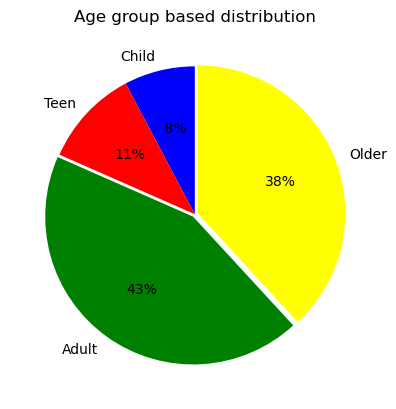

In [487]:
age_group_based_count = {
    'Child': sum(df['age_group'] == 'Child'),
    'Teen': sum(df['age_group'] == 'Teen'),
    'Adult': sum(df['age_group'] == 'Adult'),
    'Older': sum(df['age_group'] == 'Older')
}
plt.pie(age_group_based_count.values(), labels=age_group_based_count.keys(), colors=["Blue", "red", "Green","yellow"], autopct='%2.0f%%', startangle=90,explode=(0.0,0.0,0.02,0.02))
plt.title('Age group based distribution')
plt.show()

->From above plot we can say that most of the passengers are Adults where the least are children

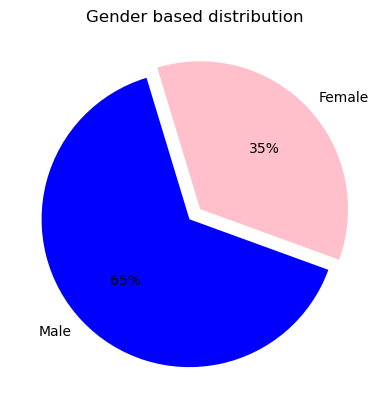

In [488]:
gender_based_count = {"Female":sum(df['Sex']=='female'),"Male":sum(df['Sex']=='male')}
plt.pie(gender_based_count.values(), labels=gender_based_count.keys(), colors=["Pink", "Blue"], autopct='%2.0f%%', startangle=2500,explode = (0.05,0.05))
plt.title('Gender based distribution')
plt.show()

->Most of the passengers are Male

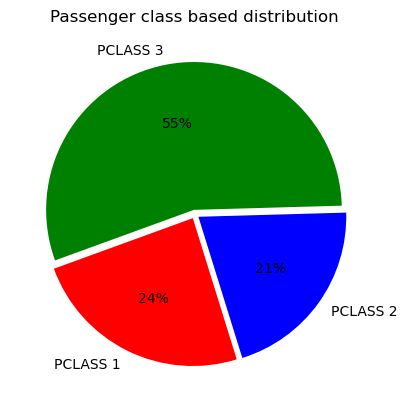

In [489]:
class_based_count ={1:sum(df['Pclass']==1),2:sum(df['Pclass']==2),3:sum(df['Pclass']==3)}
plt.pie(class_based_count.values(), labels=[f"PCLASS {i}" for i in class_based_count.keys()], colors=["red", "Blue","Green"], autopct='%2.0f%%', startangle=200,explode=(0.03,0.03, 0.03))
plt.title('Passenger class based distribution')
plt.show()

->Higher class people has occupied most of the seats

In [490]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

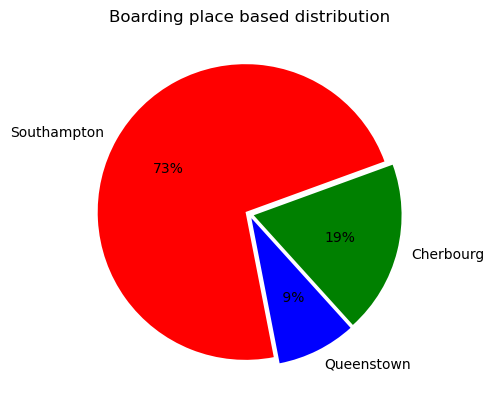

In [491]:
embark_based_count ={'Southampton':sum(df['Embarked']=='S'),'Queenstown':sum(df['Embarked']=='Q'),'Cherbourg':sum(df['Embarked']=='C')}

plt.pie(embark_based_count.values(), labels=embark_based_count.keys(), colors=["red", "Blue","Green"], autopct='%2.0f%%', startangle=20,explode=(0.03,0.03, 0.03))
plt.title('Boarding place based distribution')
plt.show()

->Southampton has the highest count of passengers than Chebourg and Queenstown

In [492]:
print(df['Parch'].unique())
print(df['SibSp'].unique())
df['Family'] = df['Parch']+df['SibSp']

[0 1 2 5 3 4 6]
[1 0 3 4 2 5 8]


In [493]:
family_count = dict()
for i in df['Family'].unique():
    family_count[i] = sum(df['Family']==i)



In [494]:
family_count = dict(sorted(family_count.items(),key = lambda x: x[0]))
print(family_count)

{0: 537, 1: 161, 2: 102, 3: 29, 4: 15, 5: 22, 6: 12, 7: 6, 10: 7}


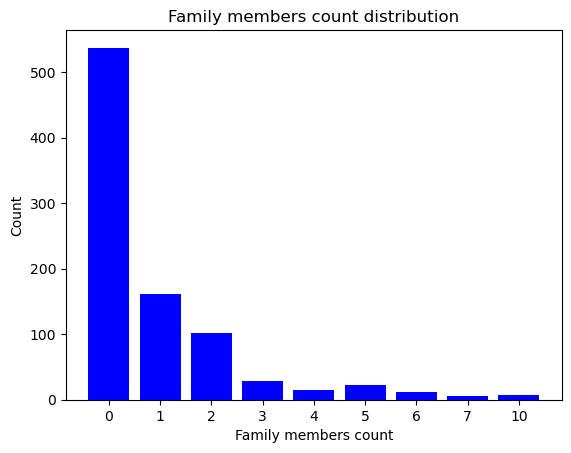

In [495]:
plt.bar([str(i) for i in family_count.keys()], family_count.values(), color="Blue")
plt.xlabel('Family members count')
plt.ylabel('Count')
plt.title('Family members count distribution')
plt.show()

->Most of the passengers prefered to board alone

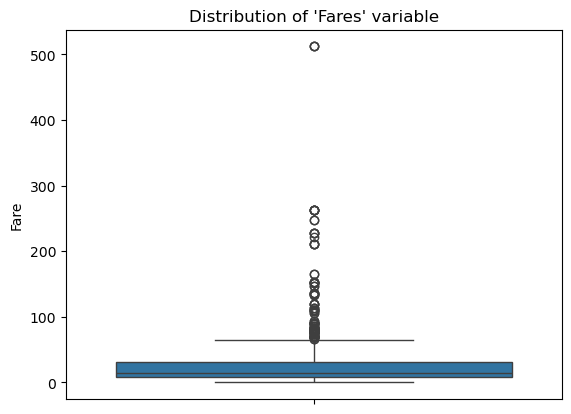

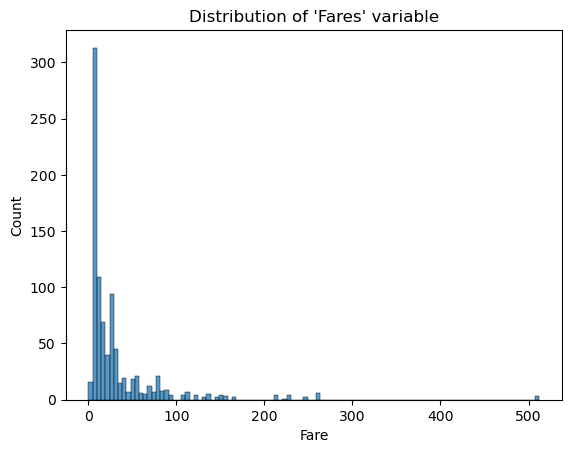

In [496]:
#Ditribution of fare
sns.boxplot(y=df['Fare'])
plt.title("Distribution of 'Fares' variable")
plt.show()
sns.histplot(x = df['Fare'])
plt.title("Distribution of 'Fares' variable")
plt.show()

->Only few passengers paid more than 100$
->Rarly some of them paid more than 200$

SURVIVAL RATE ANALYSIS

In [497]:
print(df['Survived'].unique())

[0 1]


In [498]:
print(f'Survival rate :{sum(df['Survived']==1)/len(df['Survived'])*100:0.2f} %')

Survival rate :38.38 %


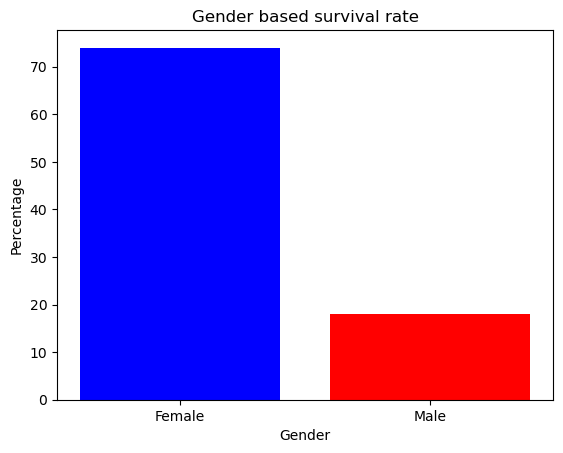

In [499]:
#Gender based survival rate
male_survived_count = len([i for i in range(len(df)) if df['Survived'][i] == 1 and df['Sex'][i]=='male' ])
female_survived_count = len([i for i in range(len(df)) if df['Survived'][i] == 1 and df['Sex'][i]=='female' ])
data = [int(female_survived_count/sum(df['Sex']=='female')*100),int(male_survived_count/sum(df['Sex']=='male')*100)]
plt.bar(["Female","Male"],data,color=["Blue","red"])
plt.title("Gender based survival rate")
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.show()

->Female passengers survived more than male with 70+% survival rate

In [500]:
#Class based survival rate
print(df['Pclass'].unique())

[3 1 2]


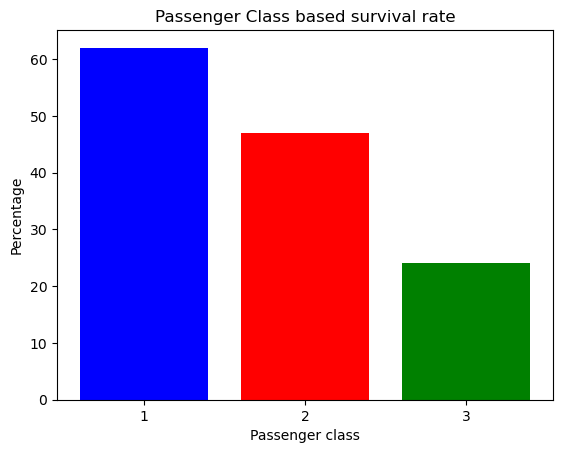

In [501]:
class_based_count ={1:sum(df['Pclass']==1),2:sum(df['Pclass']==2),3:sum(df['Pclass']==3)}
class_based_count_survived = {1:0,2:0,3:0}
for i in df['Pclass'][df['Survived']==1]:
    class_based_count_survived[i]+=1
for i,j in class_based_count_survived.items():
    class_based_count_survived[i] = int(class_based_count_survived[i]/class_based_count[i]*100)
plt.bar(['1','2','3'], class_based_count_survived.values(), color=["Blue", "red", "Green"])
plt.xlabel('Passenger class')
plt.ylabel('Percentage')
plt.title('Passenger Class based survival rate')
plt.show()


->Lower class passengers have survived more than other class passengers with 60% survival rate where the higher class peaple survived the least with 20+% survival rate

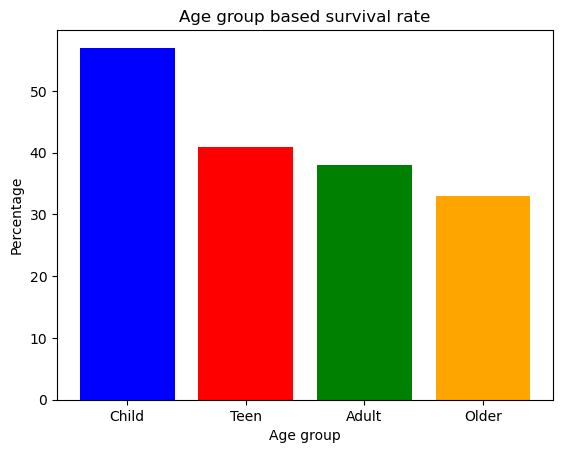

In [502]:
age_group_based_count_survived = {'Child':0,'Teen':0,'Adult':0,'Older':0}

for i in df['age_group'][df['Survived']==1]:
    age_group_based_count_survived[i]+=1
for i,j in age_group_based_count_survived.items():
    age_group_based_count_survived[i]=int(age_group_based_count_survived[i]/age_group_based_count[i]*100)
plt.bar(age_group_based_count.keys(),age_group_based_count_survived.values(),color=["Blue","red",'Green','Orange'])
plt.xlabel('Age group')
plt.ylabel('Percentage')
plt.title("Age group based survival rate")
plt.show()

->The age is inversly proportional to survival rate

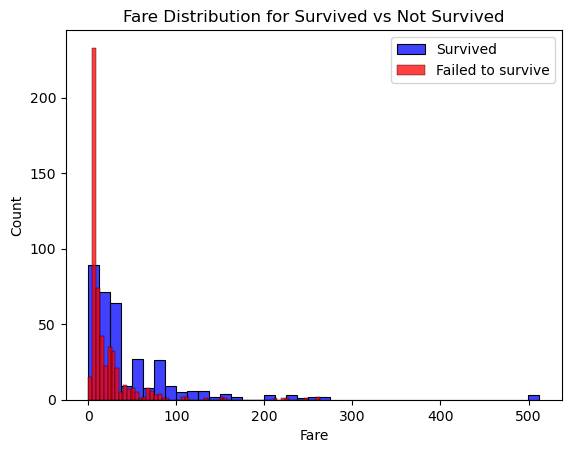

In [503]:
sns.histplot(x = df['Fare'][df['Survived']==1],color='Blue' , label = 'Survived')
sns.histplot(x = df['Fare'][df['Survived']==0],color="Red",label = 'Failed to survive')

plt.title('Fare Distribution for Survived vs Not Survived')
plt.legend()
plt.show()

Features relation with survival rate

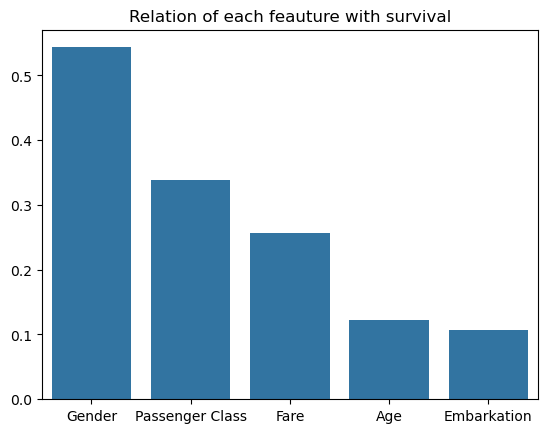

In [504]:
# converting categorical data to numeric with one hot encoding
age_group_mapping= {'Child':0,'Teen':1,'Adult':2,'Older':3}
embark_encoding={'S':0,'C':1,'Q':2}
df_new = pd.get_dummies(df[['Sex', 'Pclass']], drop_first=True)
df_new['Age'] = df['age_group'].map(age_group_mapping)
df_new['embark'] = df['Embarked'].map(embark_encoding)
df_new['Fare'] = df['Fare']
corr_with_survived = df_new.corrwith(df['Survived'])
corr_with_survived = sorted(corr_with_survived,key = lambda x: -abs(x))
sns.barplot(x=['Gender','Passenger Class','Fare','Age','Embarkation'],y=[abs(i) for i in corr_with_survived] )
plt.title("Relation of each feauture with survival")
plt.show()


->Gender's Correlation with survival is comparitively high where as Embarkation i.e boarding point corelation with survival is low

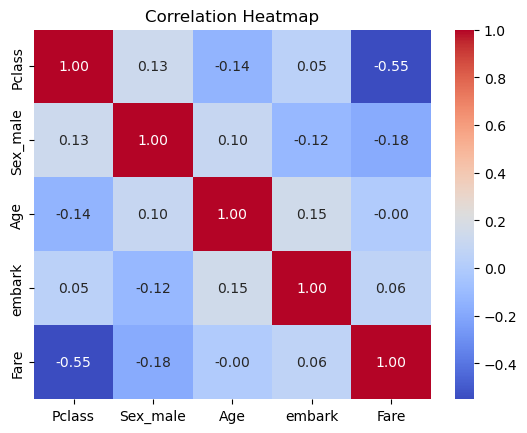

In [505]:
sns.heatmap(df_new.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


->Here we can see that Fare and Pclass are negatively related which means that 1st class passenger has higher fare fee than 3rd class passengers